# Using NA³ via the GUI

:::{.callout-note}
We´re still putting a few finishing touches onto the new implementation of NA³, so please be aware that this version remains under active development and should not yet be considered as a stable release.
:::

:::{.callout-tip}
We´re currently working on a paper describing our work in more details - make sure you stay tuned and regularly check these docs for updates!
:::

## Launching the GUI

After you successfully completed the installation of NA³ (e.g. by following our [Installation Guide](https://indoc-research.github.io/NeuralActivityCubic/installation.html)), please open a JupyterNotebook to launch the GUI of NA³.

To do this, open the Anaconda Prompt terminal (or the terminal of your choice) and make sure the virtual environment in which you installed NA³ is active. If you followed our installation guide, you should see that the input line starts with `(na3)`. If this is not the case, you can always activate it by running the following command:

In [ ]:
#|eval: false
conda activate na3

With the virtual environment in which you installed NA³ activated, please execute the following command in the terminal:

In [ ]:
#|eval: false
jupyter-lab

Next, open a new JupyterNotebook by clicking on the "Python 3 (ipykernel)" button in the *Notebook* section. In this JupyterNotebook, paste the following code in a cell:

In [ ]:
#|eval: false
import neuralactivitycubic as na3

na3.open_gui()

Then, as a final step, execute the cell, for instance by clicking on the little play icon on top while the cell is selected and the GUI of NA³ will open in the Notebook:

{{< video ./media/launch_na3_gui.mp4 >}}

:::{.callout-tip}
If you´re working on a smaller screen, e.g. if you´re using a notebook, you can use the keyboard shortcut `Ctrl + b` to collapse the file explorer panel of JupyterLab to the left of the JupyterNotebook to give you some extra horizontal space. You can always use the same keyboard shortcut again to bring it back again if needed.
:::

## Quick Walkthrough

We´re all busy people and documentation can be quite exhaustive to read. Thus, here´s a quick walkthrough of NA³´s core functionalities that should allow you to get going with your own first tests:

{{< video ./media/GUI_walkthrough.mp4 >}}

For more detailed descriptions of the individual features and settings, please see the sections below.

## General Settings

The first section of NA³'s GUI prompts you to specify the general settings of your analysis before being able to continue. Most importantly, the selections will have an impact on the structure and organization of your source data that NA³ expects. Thus, please make sure you consult the Source Data Structure section below to check what structure is requested for your specific combination of settings.

### ROI modes

NA³´s core functionality is to compute the signal intensity over time for defined regions of interest (ROIs) within the whole image. You either have the chance to provide source data that defines these ROIs ("Predefined ROIs"), or you can use NA³´s "Grid" mode to automatically create congruent square ROIs over your recording with adjustable sizes (`Grid size` - see Analysis Settings) that will be analyzed.

#### Grid (congruent squares)

The main advantage of NA³´s Grid mode is that it does not require any additional input other than your recording file to start the analysis with NA³. This can be especially useful in high-throughput settings, as it eliminates additional (potentially manual) preprocessing steps to generate ROIs.

#### Predefined ROIs

Sometimes you want to investigate specific features instead of the whole field of view, though. For this, NA³ provides the option for you to provide predefined ROIs along with your source data. Currently, only ROIs created with the [ImageJ tools](https://imagej.net/) are supported.

:::{.callout-tip}
The predefined ROI filetype that your are using is currently not supported? That needs to be changed! Please drop us your feature request via [GitHub](https://github.com/Indoc-Research/NeuralActivityCubic/issues/new) and we´ll implement it for you asap.
:::

### Batch mode

The period of trouble shooting and of adjusting individual experimental parameters is finally over and you are ready to process all your data at once? That´s awesome, congrats! As an additional reward, NA³ offers you a batch mode feature: You select your entire dataset as source data and then only have to specify the settings once, hit "Run Analysis" and then leave for a well deserved end-of-day, while NA³ and your computer do the heavy lifting for you and process your entire dataset, recording after recording. Batch mode is compatible with all ROI-modes (Grid & predefined ROIs), and can even be combined with Focus Areas.

### Focus areas

This feature is for those of you who want - or may need - to squeeze out every single percent of processing speed. It allows you to provide another ROI (or even set of ROIs), to which NA³ will restrict it´s analysis, while ignoring any ROIs that reside outside of these Focus Areas. Since processing of each ROI takes ~ the same amount of time (it can be considered a linear operation), not processing 50 % of the ROIs will cut your processing time almost in half! We tried to illustrate this with the following example, in which we used NA³´s Grid mode with the Focus Area being disabled or enabled, saving ~2/3´s of processing time:

![Focus Area mode to max out performance.](./media/focus_area_speed_boost.png){width=100%}

### Source data structure

NA³ expects your source data to be organized in a very specific manner for it to function correctly, and this structure looks slightly different, depending on which processing modes you want to use. We actually spent quite some time thinking about it, with the intention of creating a structure that does not result in conflicts when you start switching between modes when exploring what method fits your data best and requires you to constantly re-adjust your source data. But this will only become evident over time when people like you test and use NA³ - so we´d highly appreciate your feedback, especially if you should run into some issues with the required source data structures! Please open an issue on GitHub and we´re eager to fix it.

To understand what source data structure is expected for your specific combination of processing modes, we provide you with representative examples for each. Please expand the following sections to browse through them. In all cases, the "Source Data Path" that you have to select when using NA³ is always the file/folder that is shown at the very top and is highlighted in magenta (e.g. the parent directory `your_dataset/` or `single_recording/`, or the recording file itself `your_recording_file.avi`):

::: {.callout-note title = "ROI-mode: Grid" collapse="true"}

::: {.callout-tip title = "Focus Area: OFF" appearance="simple" collapse="true"}

This is as straightforward as it gets! All you need to do is select the recording file you´d like to analyze:

![Batch-mode: OFF | ROI-mode: Grid (congruent squares) | Focus Area: OFF](./media/Source_Data_Structure_Grid-ON_Focus-OFF_Batch-OFF_cropped.png){width=600}

:::

::: {.callout-tip title = "Focus Area: ON" appearance="simple" collapse="true"}

This requires you to organize your data within a directory (called `single_recording` in this example) which contains your recording file and another subdirectory in which the Focus Area ROI(s) are located. This subdirectory must be called `focus_areas` for NA³ to be able to recognize it:

![Batch-mode: OFF | ROI-mode: Grid (congruent squares) | Focus Area: ON](./media/Source_Data_Structure_Grid-ON_Focus-ON_Batch-OFF_cropped.png){width=600}

:::

:::


::: {.callout-note title = "ROI-mode: predefined ROIs" collapse="true"}

::: {.callout-tip title = "Focus Area: OFF" appearance="simple" collapse="true"}

Using predefined ROIs for analysis rather than the automatically generated Grid requires you to organize your source data within a directory (called `single_recording` in this example), which contains a single recording file (e.g. `your_recording.avi` in this example) and as many ROI files as you need. In this example, there is only a single `predefined_ROIs.zip` file, which was generated with ImageJ2 and which contains multiple ROIs. You could, however, also provide each ROI individually, e.g. as `ROI_a.roi`, `ROI_b.roi`, and so on.

![Batch-mode: OFF | ROI-mode: predefined ROIs | Focus Area: OFF](./media/Source_Data_Structure_Grid-OFF_Focus-OFF_Batch-OFF_cropped.png){width=600}

:::

::: {.callout-tip title = "Focus Area: ON" appearance="simple" collapse="true"}

Using predefined ROIs for analysis rather than the automatically generated Grid requires you to organize your source data within a directory (called `single_recording` in this example), which contains a single recording file (e.g. `your_recording.avi` in this example) and as many ROI files as you need. In this example, there is only a single `predefined_ROIs.zip` file, which was generated with ImageJ2 and which contains multiple ROIs. You could, however, also provide each ROI individually, e.g. as `ROI_a.roi`, `ROI_b.roi`, and so on.

For NA³ to differentiate between predefined ROIs you´d like to analyze, and ROIs that are intended as Focus Areas, you have to provide the Focus Area ROIs within a subdirectory that must be named `focus_areas`. In this directory, you can provide as many ROI files as needed, just like for the predefined ROIs.

![Batch-mode: OFF | ROI-mode: predefined ROIs | Focus Area: ON](./media/Source_Data_Structure_Grid-OFF_Focus-ON_Batch-OFF_cropped.png){width=600}

:::

:::

::: {.callout-important title = "Batch mode: ON" collapse="true"}

With activate batch mode, you essentially have to provide the same data structure as described above for each individual recording, and then organize all recordings as nested directory. You can find some representative examples again for all possible mode combinations with enabled batch mode below:

::: {.callout-note title = "ROI-mode: Grid" icon=false collapse="true"}

::: {.callout-tip title = "Focus Area: OFF" appearance="simple" icon=false collapse="true"}

In this case, you only need to separate the respective recording files in individual subdirectories:

![Batch-mode: ON | ROI-mode: Grid (congruent squares) | Focus Area: OFF](./media/Source_Data_Structure_Grid-ON_Focus-OFF_Batch-ON_cropped.png){width=600}

:::

::: {.callout-tip title = "Focus Area: ON" appearance="simple" icon=false collapse="true"}

With enabled Focus Area, you can specify focus area ROIs for each recording individually. For this, you have to add a subdirectory called `focus_areas` within the respective recording subdirectory. Please note, that you can add different focus area ROIs for each recording, and you can also opt to not provide any focus area ROIs for individual recordings - here, the entire field of view will then be analyzed.

![Batch-mode: ON | ROI-mode: Grid (congruent squares) | Focus Area: ON](./media/Source_Data_Structure_Grid-ON_Focus-ON_Batch-ON.png){width=600}

:::

:::

::: {.callout-note title = "ROI-mode: predefined ROIs" icon=false collapse="true"}

::: {.callout-tip title = "Focus Area: OFF" appearance="simple" icon=false  collapse="true"}

If you´d like to use batch mode processing in combination of using predefined ROIs for analyses, please organize your individual recordings together with the corresponding ROI files into separate subdirectories. Please note, that you can (obviously) provide different ROI files for each recording, and that they also don´t have to be of the same filetype (e.g. `.zip` and `.roi` files in this example):

![Batch-mode: ON | ROI-mode: predefined ROIs | Focus Area: OFF](./media/Source_Data_Structure_Grid-OFF_Focus-OFF_Batch-ON.png){width=600}

:::

::: {.callout-tip title = "Focus Area: ON" appearance="simple" icon=false collapse="true"}

To use predefined ROIs with enabled Focus Area and batch mode, please provide your data organized as depicted below. Again, please note that any combination of ROI files - for both predefined ROIs and Focus Areas - is possible. For the Focus Areas, it´s also supported to not provide ROIs for individual recordings. You always have to provide some predefined ROIs, though, if you select this mode. 

![Batch-mode: ON | ROI-mode: predefined ROIs | Focus Area: ON](./media/Source_Data_Structure_Grid-OFF_Focus-ON_Batch-ON.png){width=600}

:::

:::

:::

## Analysis Settings

NA³ provides you with several option to configure the analysis exactly as you need it for your specific dataset. There are a few settings, however, that are strictly required (grouped here in the "Analysis Settings") and some that are optional (correpsondingly in the "Optional Settings"). For all required settings, there are default values specified that NA³ will use if you don´t change them. They certainly provide a generic good-fit, but you might want to tweak some of them as needed to accomodate for some special characteristics of your individual dataset!

### Grid Size

Allows you to specify the size in pixel of the congruent squares that will be generated and used as ROIs for analysis. For instance, selecting "10" means that NA³ will create 10 x 10 pixel squares as ROIs for analysis. You can use the *Preview* button next to the slider widget to create a preview of how the grid would look like on your specific data. Moreover, NA³ will highlight the area within the field of view within which the indicated squares will be analyzed by a cyan box. This can be of interest, as NA³ might crop your image - depending on the dimensions of your field of view and the selected grid size - to ensure equal sizes of the square ROIs across the entire field of view. Again, as an example, if your field of view is 432 x 567 px, and you specify a grid size of 10 x 10 px, NA³ will crop your field of view by 2 and 7 pixels, respectively - i.e. to 430 x 560 px - to be able to fill the entire (remaining) field of view with congruent squares.

::: {.callout-note}

Please note that this setting is only available in the ROI mode "Grid (congruent squares)" is selected.

:::
 

### Signal-to-Noise Ratio (SNR)

To identify peaks within the signal intensity trace (i.e. a timeseries of bit-values) for each analysis ROI, NA³ leverages the [find_peaks_cwt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks_cwt.html) function implemented by SciPy. The SNR value you specify in NA³ will be used as `min_snr` in when calling the [find_peaks_cwt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks_cwt.html) function.

### Noise Window Size (NWS)

The SNR value you specify in NA³ will be used as `window_size` in when calling the [find_peaks_cwt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks_cwt.html) function.

### Signal Average Threshold (SAT)

This value allows you to correct for global background noise. For each analysis ROI, NA³ computes the mean intensity value over the entire timeseries for the specified analysis interval. Only if this "average signal" matches or exceeds the defined SAT value, peak detection computations will be performed for this analysis ROI.

### Minimal Activity Counts (MAC)

Allows to filter out analysis ROIs with too few peaks. If there were less peaks detected for a given analysis ROI than defined as MAC, this ROI will be excluded from the final results.

### Baseline Estimation Method

NA³ computes area-under-curve for the identified peaks. In order to do so, a baseline for the signal is required. For this, NA³ leverages a selection of the baseline estimation methods offered by [pybaselines](https://pybaselines.readthedocs.io/en/latest/):

- Asymmetric Least Squares: Uses the [asls](https://pybaselines.readthedocs.io/en/latest/api/pybaselines/api/index.html#pybaselines.api.Baseline.asls) method with it´s default values. See [here](https://pybaselines.readthedocs.io/en/latest/algorithms/whittaker.html#asls-asymmetric-least-squares) for additional information and representative baseline computations using this method.

- Fully Automatic Baseline Correction: Uses the [fabc](https://pybaselines.readthedocs.io/en/latest/api/pybaselines/api/index.html#pybaselines.api.Baseline.fabc) method with it´s default values. See [here](https://pybaselines.readthedocs.io/en/latest/algorithms/classification.html#fabc-fully-automatic-baseline-correction) for additional information and representative baseline computations using this method.

- Peaked Signal's Asymmetric Least Squares Algorithm: Uses the [asls](https://pybaselines.readthedocs.io/en/latest/api/pybaselines/api/index.html#pybaselines.api.Baseline.psalsa) method with it´s default values. See [here](https://pybaselines.readthedocs.io/en/latest/algorithms/whittaker.html#psalsa-peaked-signal-s-asymmetric-least-squares-algorithm) for additional information and representative baseline computations using this method.

- Standard Deviation Distribution: Uses the [asls](https://pybaselines.readthedocs.io/en/latest/api/pybaselines/api/index.html#pybaselines.api.Baseline.std_distribution) method with it´s default values. See [here](https://pybaselines.readthedocs.io/en/latest/algorithms/classification.html#std-distribution-standard-deviation-distribution) for additional information and representative baseline computations using this method.


::: {.callout-tip title = "Not the Baseline Estimation method you´re looking for?!"}

With the highly modular design of NA³, it is very straightforward for us to implement any of the baseline estimation methods provided by the [pybaselines](https://pybaselines.readthedocs.io/en/latest/) Python package. So if there is another one that sparks your interest or is absolutely crucial for your specific analysis - don´t hesitate for even a second! Please drop us your request directly via [GitHub](https://github.com/Indoc-Research/NeuralActivityCubic/issues/new) and we´ll be happy to implement it for you.

:::

## Optional settings

NA³ also provides you with some optional settings. These are - as their category indicates - not required for processing of your Calcium Imaging data, but enable you to make some very specifc adjustments. To enable them, click the check box and the corresponding settings widget will appear - uncheck the checkbox again, and the settings widgets dissapear (and the settings you made will be ignored). 

### Include Variance

As described in the original paper by Prada et al. (2018), the signal´s variance can be used as a proxy for neuronal excitability[^1]. To enable variance computation of the signal for your analysis, click the checkbox next to "include variance". A new widget will appear and allow you to specify the `Variance` value (default: 15). This is the window size that will be used to compute the variance of the signal intensity for each analysis ROI with a sliding window approach.


[^1]: Prada J, Sasi M, Martin C, Jablonka S, Dandekar T, Blum R (2018) An open source tool for automatic spatiotemporal assessment of calcium transients and local 'signal-close-to-noise' activity in calcium imaging data. PLoS computational biology 14(3): e1006054. https://doi.org/10.1371/journal.pcbi.1006054

### Analyze Interval

If you are interested in analyzing only a specific interval of your recording, this feature is for you. Simply enable it by clicking the checkbox and another widget will appear, allowing you to use two sliders that specify start & end frame of the interval you´d like to analyze (inclusive ends, e.g. `12 - 55` means that you will analyze the interval starting at frame 12 and ending at frame 55, with both frames 12 & 55 included).

::: {.callout-important}

If you´re using this feature in combination with enabled batch mode processing, please be aware that you are not able to configure the interval for each individual recording, but that the same frame interval will be used for all recordings in this batch!

:::

### Configure Octaves

You can enable this feature again by clicking the checkbox next to it, which will cause another widget to appear, allowing you to specify the `Min. Octaves`. As described above, NA³ uses the [find_peaks_cwt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks_cwt.html) function implemented in SciPy. You can use this optional `Min. Octaves` setting to change the value that NA³ will pass to this function as `min_length`. However, this is not a direct mapping, but `min_length` will be computed from the `Min. Octaves` value you specified, in dependence of the length (i.e. number of frames) of the respective recording. The exact computation is as follows, where:

- `self.mean_intensity_over_time.shape[0]` = Number of frames in the recording (potentially limited by analysis interval)
- `min_octave_span` = the value you set via `Min. Octaves`

In [ ]:
#|eval: false
#|output: false

widths = np.logspace(np.log10(1), np.log10(self.mean_intensity_over_time.shape[0]), 100)
min_length = octaves_ridge_needs_to_spann / np.log2(widths[1] / widths[0])

NameError: name 'np' is not defined

::: {.callout-warning}

In general, we don´t recommend changing this value unless you are highly familiar with NA³ and have utilized all other configuration options already.

:::

## Result settings

These settings allow you to specify whether you want NA³ to create result files for your current analysis (e.g. to avoid creation of result files while you´re still testing different setting configurations or are testing different processing modes). Creation of all result files is enabled by default.

### Save Overview Plot

If you uncheck this box, the `overview.png` fill will not be created.

### Save Detailed Results

If you uncheck this box, none of the other result files will be created, i.e.:
- all_peak_results.csv
- Amplitude_and_dF_over_F_results.csv
- AUC_results.csv
- Individual_traces_with_identified_events.pdf
- logs.txt
- ROI_label_IDs_overview.png
- user_settings.json
- Variance_area_results.csv

## Generated Results

NA³ generates several comprehensive result files for you (see list above). You will always find the results in the same directory in which the corresponding recording was located. That means, in case you´ve been using the batch processing mode, NA³ will create separate result folders in each recording subdirectory. The result folders will have the following naming conventions:

- `datetime`\_results_for_`recording_filename`, e.g.: 2024_12_17_13-48-54_results_for_spiking_neuron

or

- `datetime`\_results_for_`recording_filename`\_with_`focus_area_roi_filename`, e.g.: 2024_12_17_13-48-54_results_for_spiking_neuron_with_area_a

::: {.callout-note}

If you are using more than one Focus Area ROI, NA³ will create a new results directory for each of them, to ensure you can easily differentiate between them.

:::


Let´s take a look at them in more details:

### Logs & User Settings

Upfront we have two files that NA³ creates that are intended to ensure reproducibility, namely `user_settings.json` and `logs.txt`. While the human and machine readable JSON file makes sure you never forget to note down what the specific settings for this very analyses were, the Logs file saves some additional information regarding the processing and might be of value in case there is some troubleshooting or debugging that needs to happen.

### Activity Overview

NA³ offers an elegant way to capture high-level activity patterns across all ROIs of your field of view at a glance. For this, the "Activity Overview" plot is generated, that can be saved both as a separate PNG image (`activity_overview.png`) and as part of the wholistic PDF (`Individual_traces_with_identified_events.pdf`). It will look something like this:

![Representative Activity Overview Plot](./media/activity_overview.png){width=600}

It will indicate the respective ROIs with the total detected peaks per ROI, after applying all thresholding and filtering criteria (e.g. Minimum Activity Count). The plots title also informs you about the total activity detected, i.e. the sum of all individually registered peaks across all ROIs within the field of view. In this example, the Grid method was used to automatically generate congruent squares covering most of the field of view (cropping boundaries are indicated by cyan border). The x- and y-axis labels provide a unique XY ID for each of the squares, which allows you to match the information presented in other plots or result files to a uniquely identifiable ROI.

::: {.callout-tip title="What are the unique IDs of my predefined ROIs?" collapsable="true"}

There is also a `ROI_label_IDs_overview.png` file that NA³ creates, which shows the ID of each ROI within it´s respective outline - which is specifically in case of predefined ROIs an important reference, since they cannot be defined using XY coordinates in a Grid. For reasons of better visibility & readability, only the IDs of ROIs that remain after applying all fitering & thresholding critera are shown in these overviews:

![Unique label IDs for predefined ROIs](./media/ROI_label_IDs_overview.png){width=600}


:::

### Activity Traces with Identified Events

For visual inspection, the PDF `Individual_traces_with_identified_events.pdf` gives you an even more detailed overview of your analysis results - and likely also allows you to assess it´s quality with the current settings. The first three pages of the PDF contain the following plots:

- The Activity Overview plot
- A brightness and contrast enhanced image of your field of view with only the ROIs superimposed (no activity counts)
- The ROI label ID Overview plot

On all subsequent pages of this PDF will be one plot for each ROI with sufficient activity according to your settings. Each plot shows the extracted signal intensity trace (bit values on y-axis and frame number on x-axis) in gray and the estimated baseline in cyan. Identified peaks are marked with dots on the signal intensity trace, where a magenta coloration indicates that an area-under-curve (AUC) value was calculated for the respective event, while black coloration indicates that this was not possible (this is usually the case if the signal trace did not cross the estimated baseline on both sides of the peak, i.e. usually at the beginning or at the very end of the recording). Moreover, a yellow fill indicates the identified AUC, respectively.

![Representative signal trace plot with identified activity events](./media/representative_signal_trace.png){width="full"}

### CSV-encoded Results

#### All Peak Results

This table comprises all computed characteristics for each identified activity peak across all ROIs. This information can be found in each column:

- `ROI label ID`: The unique label ID that allows you to identify the ROI, e.g. "3/15" in Grid mode or "7" when using predefined ROIs, as described above.
- `peak frame index`: The frame index at which the respective peak was identified.
- `peak bit value`: The raw bit value of the signal trace at the indicated `peak frame index`. Remember: the computed signal trace represents the average intensity across all pixels within the given ROI.
- `peak amplitude`: The absolute difference between the `peak bit value` and the value of the estimated baseline at the indicated `peak frame index`, calculated as: `peak bit value` - `bit value estimated baseline`
- `peak dF/F`: The relative difference between `peak bit value` and the value of the estimated baseline at the indicated `peak frame index`, calculated as: `peak amplitude` / `bit value estimated baseline`
- `peak AUC`: The value of the area-under-curve associated with this peak. See the warning below, however.
- `peak classification`: A classification of whether the peak is `singular`, `clustered`, or `isolated`:
- - `isolated`: A peak for which no area-under-curve could be calculated. This is usually the case, if the signal trace did not cross the estimated baseline on both sides of the peak, i.e. usually at the beginning or at the very end of the recording.
  - `singular`: A peak for which an area-under-curve could be calculated that is solely associated with this singular peak, i.e. the signal trace crosses the baseline between this and any preceeding or following peaks.
  - `clustered`: A peak for which an area-under-curve could be calculated, but it is associated with multiple peaks, i.e. the signlar trace did **not** cross the baseline between this and a preceeding or following peak.

::: {.callout-warning title="AUCs of clustered peaks"}

In case of `clustered` peaks, NA³ cannot clearly associate a given AUC value with a single peak, because the signal trace does not cross the estimated baseline between two (or more) peaks. Therefore, both peaks will be listed with the identical AUC value - which you may have to take into account when you perform statistical analysis of your data. We decided to include them, though, because these `clustered` peaks could also represent event trains, which might be interesting features to look at for some of you.

:::

#### Area-under-Curve (AUC) Results

Essentially the same information about AUC values per peak, organized in a different format, though: wide instead of long.

#### Amplitude and dF/F Results

Essentially the same information about amplitude and dF/F values per peak, organized in a different format, though: wide instead of long.

#### Variance Results (optional)

Variance results will only be generated if you enabled the optional setting "Include Variance". It comprises the computed variance area per ROI.

## We´d love to hear your Feedback:

You are using NA³ for your research - or would like to do so, but there´s that one cool feature missing for you? That´s great! We´d love to hear your feedback, feature requests, or bug reports to keep improving NA³ - please use [this form on GitHub](https://github.com/Indoc-Research/NeuralActivityCubic/issues/new) to submit it, we appreciate it a lot!

Please feel free to also explore all other [Research Software](https://github.com/Indoc-Research/) that our not-for-profit organization has developed, or learn more about us and what we do on our [website](https://www.indocresearch.eu/). If you are interested to partner with us for a similar collaboration on your Research Software, or to develop it with or for you from scratch, don´t hesitate and drop us an [email](mailto:ddoll@indocresearch.org) - we´re always looking for new opportunities to catalyze science be delivering cutting-edge technology tailored to the specific research challenges of our collaborators!

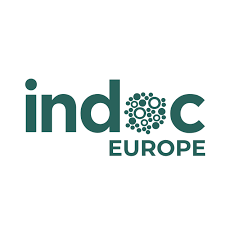